# **Libraries importing**

In [ ]:
import tensorflow as tf 
import keras 
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential 
from keras import layers

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data importing**

In [ ]:
data=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/potato',  batch_size=32,
    image_size=(256, 256),    shuffle=True,
)

Found 2152 files belonging to 3 classes.


# **EDA**

In [ ]:
classes=data.class_names

In [ ]:
print(classes)

['Potato___Early_blight', 'Potato___Late_blight', 'potato_healthy']


In [ ]:
len(data) # 68 batches 

68

(32, 256, 256, 3)


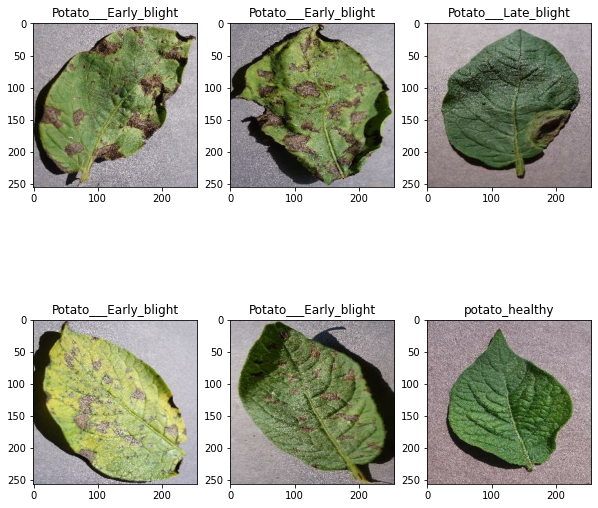

In [ ]:
plt.figure(figsize=(10,10))
for image_batch ,label_batch in data.take(1):
  print(image_batch.shape)
  for i in range(6):
    ax=plt.subplot(2,3,i+1)
    plt.imshow(image_batch.numpy()[i].astype('uint8'))
    plt.title(classes[label_batch[i]])

# **preprocessing**

**train_test_split**

In [ ]:
train_data=data.take(int(len(data)*0.8))

In [ ]:
rest=data.skip(int(len(data)*0.8))
test_data=rest.take(int(len(rest)*0.5))
validation_data=rest.skip(int(len(rest)*0.5))

**cache and prefetch**

In [ ]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_data = validation_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

**rescale and resize**

In [ ]:
resize_rescale=Sequential([tf.keras.layers.experimental.preprocessing.Resizing(256,256),tf.keras.layers.experimental.preprocessing.Rescaling(1./255)])

**Data augmentation**

In [ ]:
data_augmentation=Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),tf.keras.layers.experimental.preprocessing.RandomContrast([0,1])])

# **model training**

In [ ]:
cnn=Sequential([
resize_rescale,
data_augmentation,
layers.Conv2D(32,activation='relu',kernel_size=(3,3),input_shape=(32,256,256,3)),#cnn and relu (feature extraction)
layers.MaxPooling2D((2,2)),#pooling(reduce the size)
layers.Convolution2D(100,kernel_size=(3,3),activation='relu'),
layers.MaxPooling2D((2,2)),
layers.Flatten(),
layers.Dense(64,activation='relu'),
layers.Dense(3,activation='softmax'),
])

In [ ]:
cnn.build(input_shape=(32,256,256,3))

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=cnn.fit(train_data,batch_size=32,epochs=10,validation_data=validation_data,verbose=1)

Epoch 1/10


54/54 [==============================] - 39s 477ms/step - loss: 1.0864 - accuracy: 0.7691 - val_loss: 0.3919 - val_accuracy: 0.8000
Epoch 2/10
54/54 [==============================] - 21s 396ms/step - loss: 0.2263 - accuracy: 0.9144 - val_loss: 0.2965 - val_accuracy: 0.8350
Epoch 3/10
54/54 [==============================] - 23s 425ms/step - loss: 0.1668 - accuracy: 0.9346 - val_loss: 0.1558 - val_accuracy: 0.9600
Epoch 4/10
54/54 [==============================] - 27s 509ms/step - loss: 0.1630 - accuracy: 0.9369 - val_loss: 0.1539 - val_accuracy: 0.9400
Epoch 5/10
54/54 [==============================] - 26s 491ms/step - loss: 0.1390 - accuracy: 0.9479 - val_loss: 0.1782 - val_accuracy: 0.9350
Epoch 6/10
54/54 [==============================] - 21s 393ms/step - loss: 0.1025 - accuracy: 0.9601 - val_loss: 0.1402 - val_accuracy: 0.9300
Epoch 7/10
54/54 [==============================] - 22s 409ms/step - loss: 0.1460 - accuracy: 0.9468 - val_loss: 0.1673 - val_accuracy: 0.9450
Epoch 8/10

# **Evaluation**

In [ ]:
cnn.evaluate(test_data)

7/7 [==============================] - 4s 29ms/step - loss: 0.1207 - accuracy: 0.9554


[0.12069972604513168, 0.9553571343421936]

In [ ]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [ ]:
training_acc=history.history['accuracy']

In [ ]:
training_validation=history.history['val_accuracy']

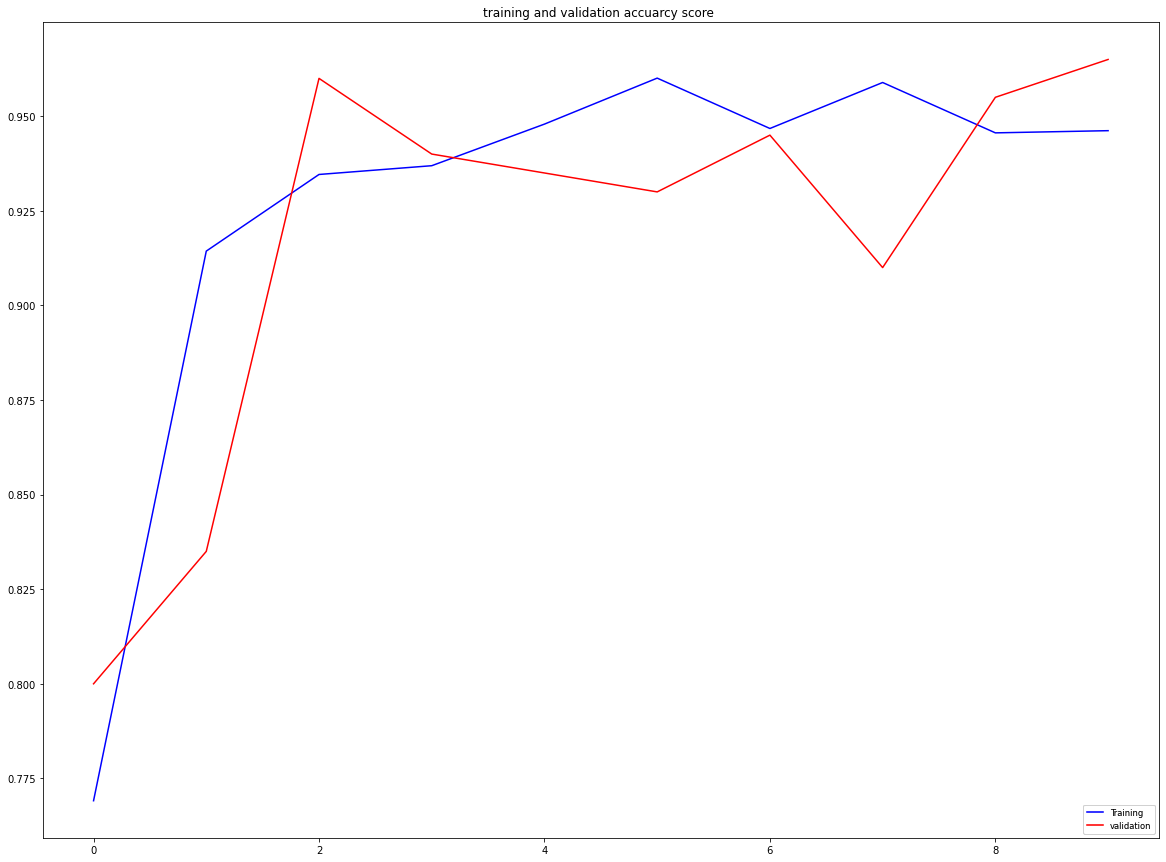

In [ ]:
fig,ax=plt.subplots(figsize=(20,15))
plt.title('training and validation accuarcy score ')
ax.plot(range(len(training_acc)),training_acc,c='b')
ax.plot(range(len(training_acc)),training_validation,c='r')
legend2 = ax.legend(['Training', 'validation'], loc='lower right', fontsize='small')
ax.add_artist(legend2)


# **Predicting**

Test data
1/1 [==============================] - 0s 465ms/step


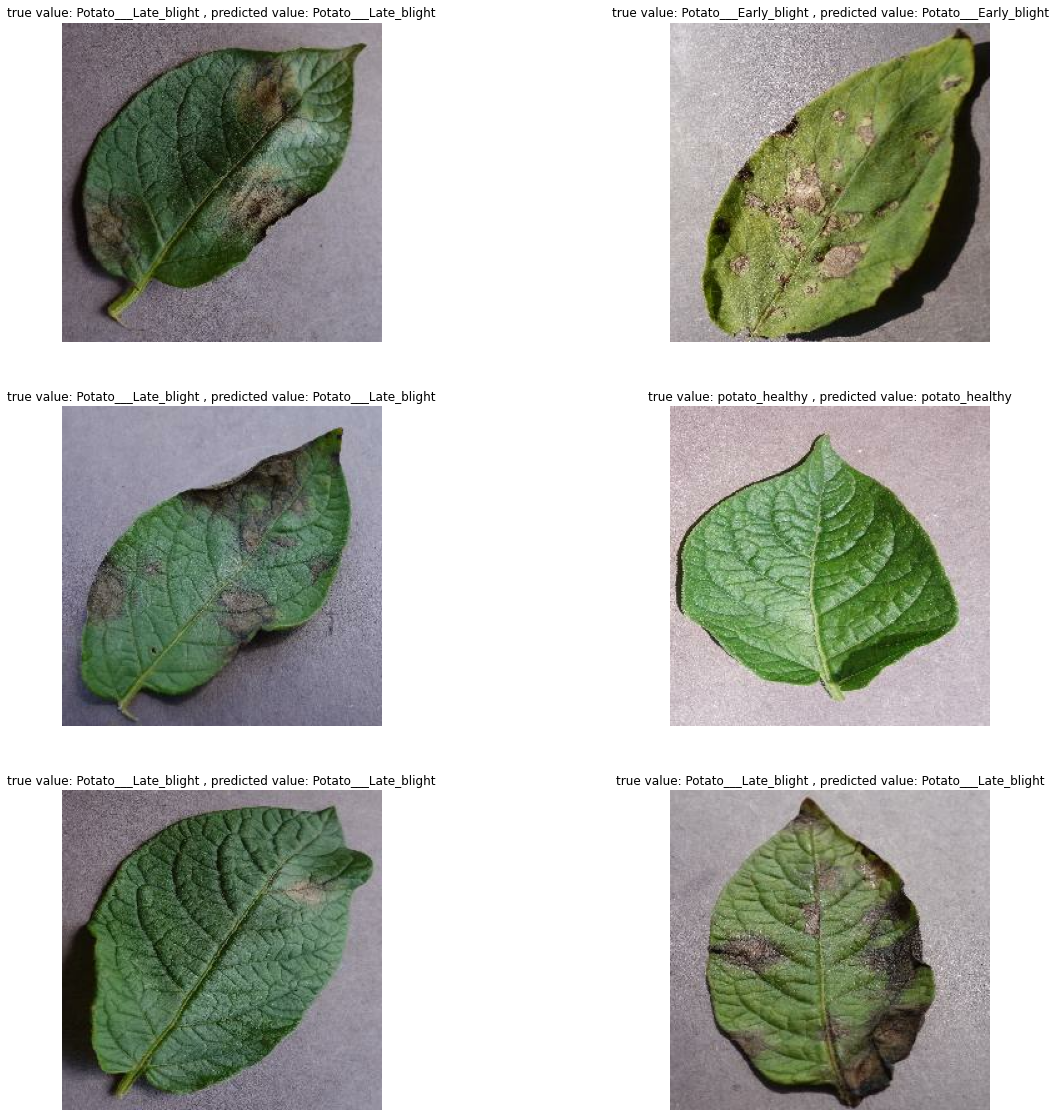

In [ ]:
plt.figure(figsize=(20,20))
print('Test data')
for image_batch,label_batch in test_data.take(1):
  batch_predict=cnn.predict(image_batch)
  for i in range(0,6):
    plt.subplot(3,2,i+1)
    plt.imshow(image_batch.numpy()[i].astype('uint8'))
    plt.title(f'true value: {classes[label_batch.numpy()[i]]} , predicted value: {classes[np.argmax(batch_predict[i])]}')
    plt.axis('off')